In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("../data/ifood_df.csv", thousands=',')

In [8]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [9]:
# Definindo a opção para exibir todas as 38 colunas
pd.set_option('display.max_columns', 40)

In [10]:
# Convertendo a coluna 'MntTotal' para o tipo float
df['MntTotal'] = df['MntTotal'].astype('float64')

In [11]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529.0,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21.0,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734.0,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48.0,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407.0,392,0


### Calcular número de clientes que representam 20% - Utilizando a técnica de pareto ("Método que identifica que, em muitos casos, 80% dos efeitos vêm de 20% das causas")

In [12]:
# 1. Calcular o número de clientes que representam 20%
n = int(len(df) * 0.20)

# 2. Usar nlargest() para obter o novo DataFrame
df_top_20_percent = df.nlargest(n, 'MntTotal')

In [13]:
df_top_20_percent["Age"].value_counts()

Age
50    19
38    17
49    15
55    15
66    14
48    14
45    13
51    13
62    13
58    12
59    11
44    11
64    11
32    11
61    11
46    11
34    10
65    10
47    10
68    10
67     9
71     9
54     9
56     9
41     8
43     8
63     8
72     8
42     8
69     8
60     8
33     7
40     7
53     7
37     7
73     7
29     7
57     6
36     5
39     5
74     5
28     4
30     4
52     4
31     4
35     3
75     3
76     3
77     2
26     2
25     2
70     2
79     1
27     1
Name: count, dtype: int64

#### Criar novo atributo para representar os intervalos de idade (Já que a coluna Age contem informação granula)

In [14]:
# criar os intervalos de idade

# lista com os limites dos intervalos
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]

# lista com os rótulos (strings)
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

df_top_20_percent['Age_Group'] = pd.cut(df_top_20_percent['Age'], bins=bins, labels=labels, right=True)

In [15]:
df_top_20_percent["Age_Group"].info()

<class 'pandas.core.series.Series'>
Index: 441 entries, 1467 to 1308
Series name: Age_Group
Non-Null Count  Dtype   
--------------  -----   
441 non-null    category
dtypes: category(1)
memory usage: 4.2 KB


#### Plotar graficos para visualizar a distribuição dos 20% dos clientes por faixa etária

DataFrame com a contagem de clientes por grupo de idade (filtrado):
  Age_Group  Num_Clients
1     20-30           20
2     30-40           76
3     40-50          117
4     50-60           94
5     60-70           96
6     70-80           38


C:\Users\mdangoni\AppData\Local\Temp\ipykernel_28868\1279055224.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Age_Group', y='Num_Clients', data=df_plot, palette='viridis')


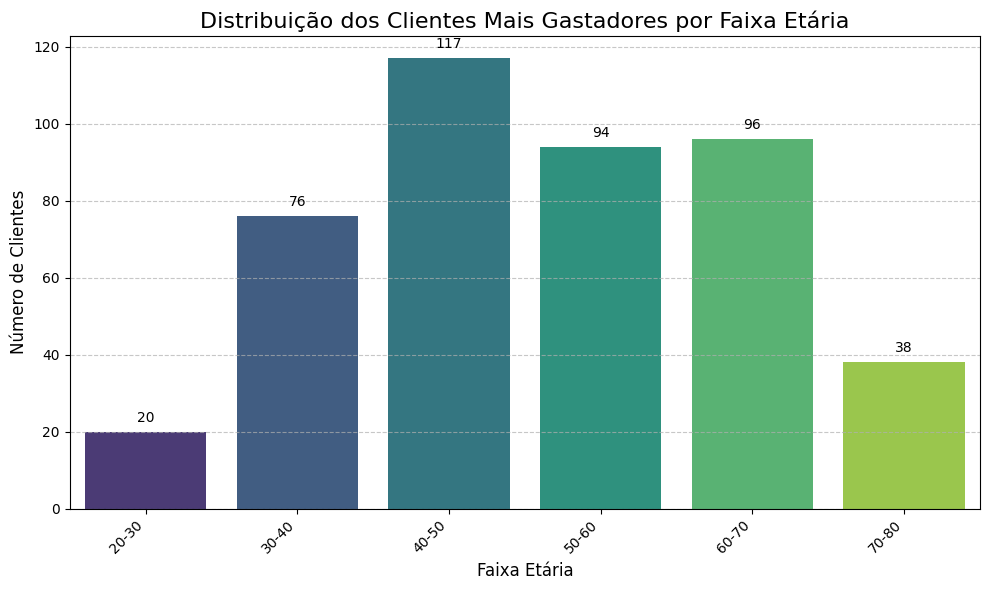

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Contar a frequência de cada faixa etária
# O sort=False mantém a ordem das faixas como definida nos labels
contagem_grupos = df_top_20_percent['Age_Group'].value_counts(sort=False)

# 3. Filtrar e preparar os dados para o gráfico
# Converte a Series em um DataFrame e renomeia as colunas
df_contagem = contagem_grupos.reset_index()
df_contagem.columns = ['Age_Group', 'Num_Clients']

# Filtra as linhas com contagem igual a zero
df_plot = df_contagem[df_contagem['Num_Clients'] > 0].copy()

# Isso remove a informação de que ela era um tipo categórico
df_plot['Age_Group'] = df_plot['Age_Group'].astype(str)

print("DataFrame com a contagem de clientes por grupo de idade (filtrado):")
print(df_plot)

# 4. Plotar o gráfico com os dados filtrados
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Age_Group', y='Num_Clients', data=df_plot, palette='viridis')

# --- AQUI ESTÁ A MUDANÇA: Adicionando os valores em cima de cada barra ---
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Formata o valor como inteiro
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10,
                color='black')

# Adicionando título e rótulos
plt.title('Distribuição dos Clientes Mais Gastadores por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Salvar imagem na pasta /images
plt.savefig('../images/distribuicao_por_faixa_etaria.png')

plt.show()


In [17]:
# --- 1. Calcular o total de clientes no DataFrame filtrado ---
total_clientes = df_plot['Num_Clients'].sum()

print(f"Total de clientes no DataFrame filtrado: {total_clientes}")

# --- 2. Criar o novo atributo 'Percentual_user_ID' ---
df_plot['Percentual_user_ID'] = (df_plot['Num_Clients'] / total_clientes) * 100

# Arredondar para duas casas decimais para melhor visualização
df_plot['Percentual_user_ID'] = df_plot['Percentual_user_ID'].round(2)

print("\nDataFrame com o novo atributo 'Percentual_user_ID':")
print(df_plot)

Total de clientes no DataFrame filtrado: 441

DataFrame com o novo atributo 'Percentual_user_ID':
  Age_Group  Num_Clients  Percentual_user_ID
1     20-30           20                4.54
2     30-40           76               17.23
3     40-50          117               26.53
4     50-60           94               21.32
5     60-70           96               21.77
6     70-80           38                8.62


C:\Users\mdangoni\AppData\Local\Temp\ipykernel_28868\1845562131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Age_Group', y='Percentual_user_ID', data=df_plot, palette='viridis')


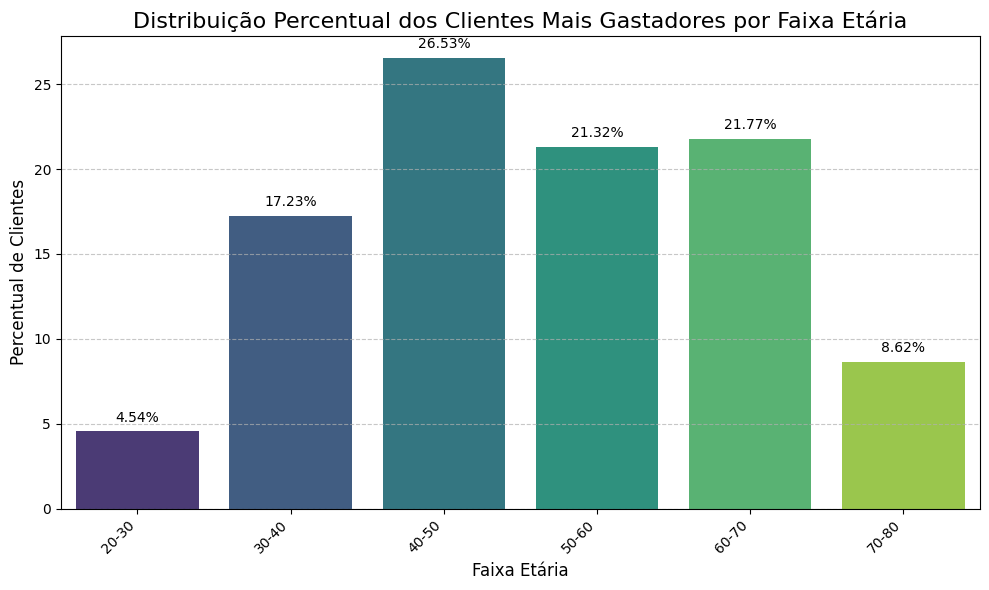

In [18]:
# Plotagem do gráfico de barras com percentual
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Age_Group', y='Percentual_user_ID', data=df_plot, palette='viridis')

# Adicionar os valores de percentual acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10,
                color='black')

plt.title('Distribuição Percentual dos Clientes Mais Gastadores por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Percentual de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Salvar imagem na pasta /images
plt.savefig('../images/distribuicao_percentual_por_faixa_etaria.png')

plt.show()

#### Criar novo atributo para representar o estado civil dos clientes

In [19]:
# Mapeamento para os nomes desejados
mapeamento_estado_civil = {
    'marital_Divorced': 'Divorciado',
    'marital_Married': 'Casado',
    'marital_Single': 'Solteiro',
    'marital_Together': 'Juntos',
    'marital_Widow': 'Viúvo'
}

# Criando a nova coluna 'Estado_Civil'
df_top_20_percent['Estado_Civil'] = df_top_20_percent[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].idxmax(axis=1)

# Substituindo os nomes das colunas pelos nomes de estado civil
df_top_20_percent['Estado_Civil'] = df_top_20_percent['Estado_Civil'].map(mapeamento_estado_civil)

df_top_20_percent.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Age_Group,Estado_Civil
1467,87679.0,0,0,62,1259,172,815,97,148,33,1,7,11,10,4,1,0,1,1,0,...,3,11,1,32,2496,0,0,0,1,0,0,0,1,0,0,2491.0,2458,3,30-40,Juntos
1159,90638.0,0,0,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,...,3,11,0,29,2295,0,0,1,0,0,0,0,0,1,0,2429.0,2333,1,20-30,Solteiro
1547,90638.0,0,0,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,...,3,11,1,29,2295,0,0,1,0,0,0,0,0,1,0,2429.0,2333,1,20-30,Solteiro
967,75759.0,0,0,46,1394,22,708,89,91,182,1,9,7,9,5,1,0,1,1,0,...,3,11,1,51,2406,0,1,0,0,0,0,0,1,0,0,2304.0,2122,3,50-60,Casado
1433,93790.0,0,0,16,1302,68,731,89,114,45,0,6,7,12,2,0,1,1,1,0,...,3,11,1,50,2296,0,0,1,0,0,0,0,1,0,0,2304.0,2259,3,40-50,Solteiro


In [20]:
# 1. Contar a frequência de cada estado civil
contagem_estado_civil = df_top_20_percent['Estado_Civil'].value_counts()

# Exibindo a contagem
print("Contagem por Estado Civil:")
print(contagem_estado_civil)

Contagem por Estado Civil:
Estado_Civil
Casado        169
Juntos        111
Solteiro      103
Divorciado     42
Viúvo          16
Name: count, dtype: int64


#### Plotar graficos para visualizar a distribuição dos 20% dos clientes por estado civil

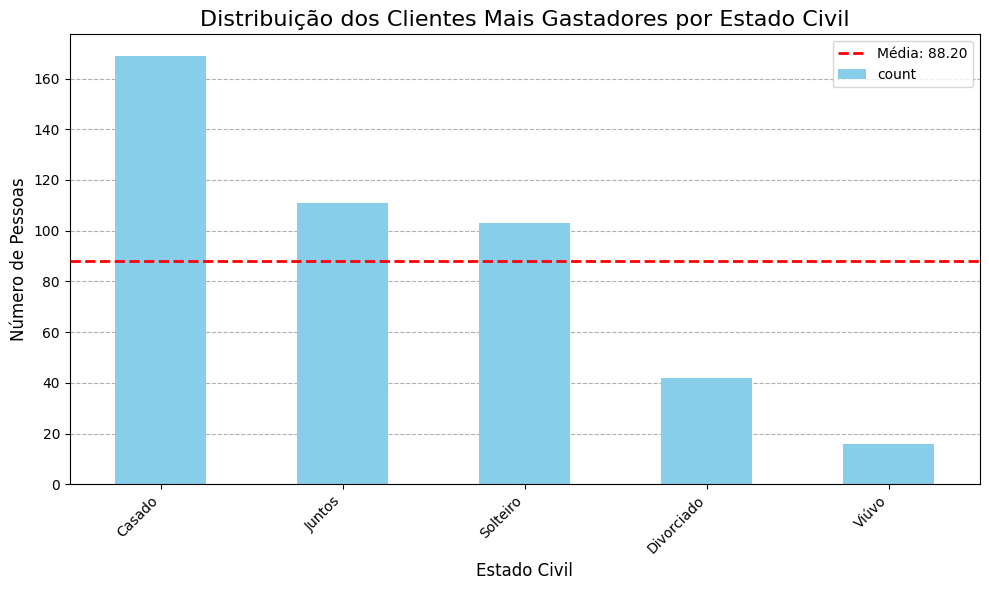

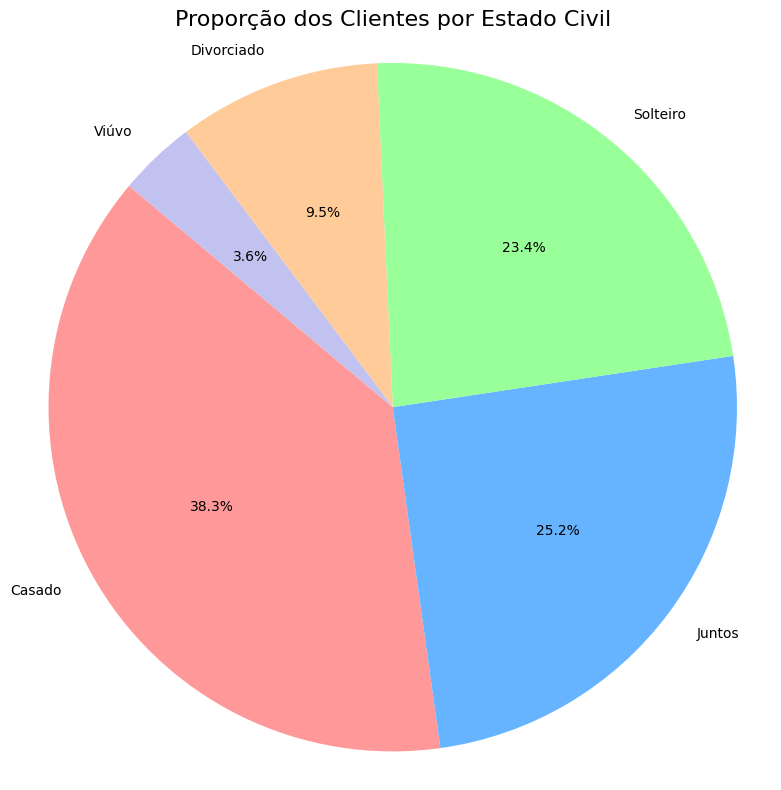

In [21]:
# 1. Calcular a média da contagem
media_contagem = contagem_estado_civil.mean()

# 3. Plotar o gráfico de barras
plt.figure(figsize=(10, 6)) # Define o tamanho da figura (largura, altura)
contagem_estado_civil.plot(kind='bar', color='skyblue', zorder=2)

# 2. Adicionar a linha da média
plt.axhline(y=media_contagem, color='red', linestyle='--', linewidth=2, label=f'Média: {media_contagem:.2f}', zorder=3)

# Adicionando títulos e rótulos
plt.title('Distribuição dos Clientes Mais Gastadores por Estado Civil', fontsize=16)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(axis='y', linestyle='--', zorder=1) # Adiciona uma grade horizontal
plt.legend() # Mostra a legenda para a linha de média
plt.tight_layout() # Ajusta o layout para evitar cortes de rótulos

# Salvar imagem na pasta /images
plt.savefig('../images/distribuicao_clientes_por_estado_civil.png')

# Exibindo o gráfico
plt.show()

# 3. Plotar o gráfico de pizza (opcional)
plt.figure(figsize=(8, 8))
plt.pie(contagem_estado_civil, labels=contagem_estado_civil.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Proporção dos Clientes por Estado Civil', fontsize=16)
plt.axis('equal')  # Garante que o círculo seja desenhado de forma igual
plt.tight_layout()

# Salvar imagem na pasta /images
plt.savefig('../images/proporcao_clientes_por_estado_civil.png')

plt.show()

#### Criar novo atributo para representar os valores gastos com vinhos por cada cliente 

In [22]:
df_top_20_percent["MntWines"]

1467    1259
1159    1156
1547    1156
967     1394
1433    1302
        ... 
1426     227
488      815
910      471
1998     753
1308     345
Name: MntWines, Length: 441, dtype: int64

In [23]:
import numpy as np

bins = [0, 250, 500, 750, 1000, 1250, 1500] # np.inf para incluir todos os valores acima de 1500

# Definindo os rótulos para cada faixa
labels = ['1 - R$250',
          '251 - R$500',
          '501 - R$750',
          '751 - R$1000',
          '1001 - R$1250',
          '1251 - R$1500']

# Criando a nova coluna 'WineInter' com as faixas
df_top_20_percent['WineInter'] = pd.cut(df_top_20_percent['MntWines'], bins=bins, labels=labels, right=True)

# Visualizando o DataFrame com a nova coluna
df_top_20_percent['WineInter'].value_counts()

WineInter
751 - R$1000     140
501 - R$750      116
1001 - R$1250     81
251 - R$500       69
1251 - R$1500     30
1 - R$250          5
Name: count, dtype: int64

#### Plotar graficos para visualizar a distribuição dos gastos com vinho


Valor médio de pessoas por faixa de gasto: 73.50



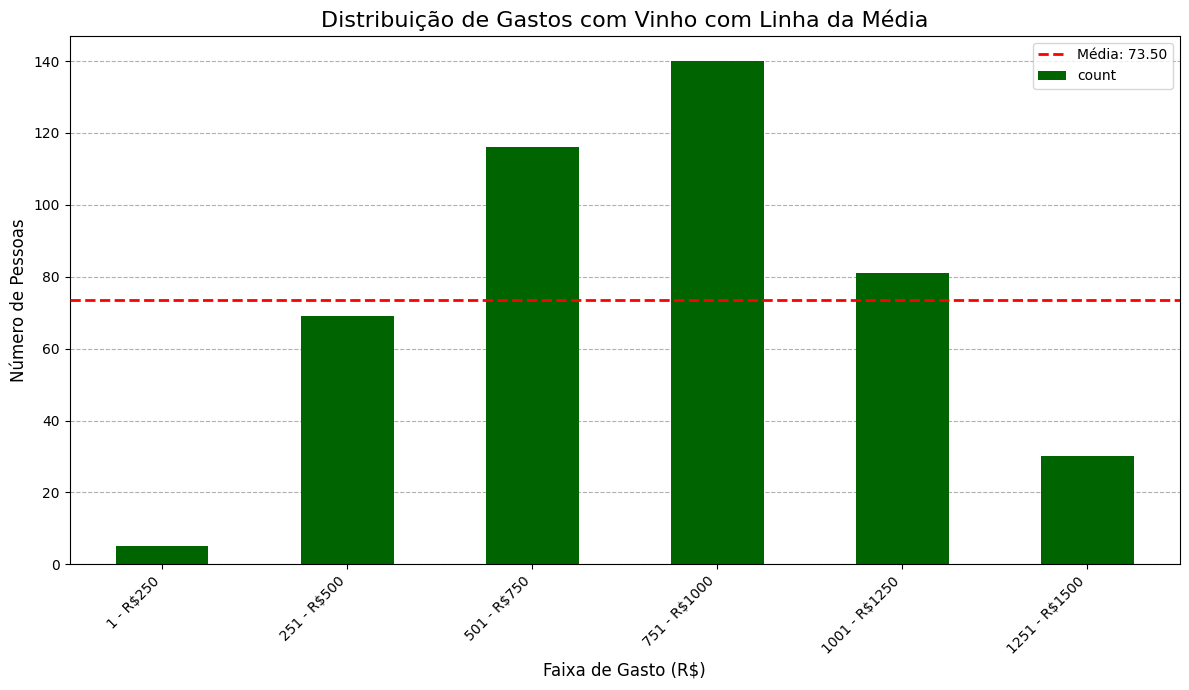

In [24]:
# 1. Contar a frequência de cada faixa de gasto
contagem_faixa_vinho = df_top_20_percent['WineInter'].value_counts().sort_index()

# 2. Calcular a média da contagem
media_contagem = contagem_faixa_vinho.mean()
print(f"\nValor médio de pessoas por faixa de gasto: {media_contagem:.2f}\n")

# 3. Plotar o gráfico de barras
plt.figure(figsize=(12, 7))
contagem_faixa_vinho.plot(kind='bar', color='darkgreen', zorder=2) # zorder=2 para as barras ficarem em cima

# 4. Adicionar a linha da média
plt.axhline(y=media_contagem, color='red', linestyle='--', linewidth=2, label=f'Média: {media_contagem:.2f}', zorder=3)

# Adicionando títulos e rótulos
plt.title('Distribuição de Gastos com Vinho com Linha da Média', fontsize=16)
plt.xlabel('Faixa de Gasto (R$)', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', zorder=1) # zorder=1 para a grade ficar no fundo
plt.legend() # Mostra a legenda da linha
plt.tight_layout()

# Salvar imagem na pasta /images
plt.savefig('../images/distribuicao_de_gastos_com_vinho.png')

# Exibindo o gráfico
plt.show()